# Spectral distribution of straylight in MRS compact source observations
The third calibration step in the baseline MRS calibration pipeline (after assigning WCS information and applying the pixel flat), is the straylight subtraction. This step comes before the fringe correction and the flux calibration.  
  
In this notebook we use the method of straylight subtraction (version 2) developed by Adrian Glauser and Polychronis Patapis at ETH Zurich (see MIRI-TN-00003-ETH-1.0_MRS_straylight). We check what the amount of calculated straylight is in data of an 800K BB point source observed during testing carried out at RAL (MIRI FM test campaign). This is done in multiple MRS bands (to try and determine the spectral variation of the straylight).

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [38]:
# import modules
import funcs
import mrsobs

from numpy import nonzero,isnan
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
plt.style.use('presentation')
%matplotlib notebook

import warnings
warnings.simplefilter('ignore')

In [2]:
# Define paths to data
workDir   = '/Users/ioannisa/Desktop/python/miri_devel/'
cdpDir    = workDir+'cdp_data/'
d2cMapDir = workDir+'distortionMaps/'

In [3]:
# save results
#--FM RAD_06
xpos_FM_RAD_06 = funcs.load_obj('xpos_FM_RAD_06')
point_source_signal_FM_RAD_06 = funcs.load_obj('point_source_signal_FM_RAD_06')
straylight_imgs_FM_RAD_06 = funcs.load_obj('straylight_imgs_FM_RAD_06')

#--FM OPT_06
xpos_FM_OPT_06 = funcs.load_obj('xpos_FM_OPT_06')
point_source_signal_FM_OPT_06 = funcs.load_obj('point_source_signal_FM_OPT_06')
straylight_imgs_FM_OPT_06 = funcs.load_obj('straylight_imgs_FM_OPT_06')

#--CV2 (multiple pointings)
xpos_CV2 = funcs.load_obj('xpos_CV2')
point_source_signal_CV2 = funcs.load_obj('point_source_signal_CV2')
straylight_imgs_CV2 = funcs.load_obj('straylight_imgs_CV2')

#--OTIS PAAH ASPA source (multiple pointings)
xpos_OTIS_PAAH = funcs.load_obj('xpos_OTIS_PAAH')
point_source_signal_OTIS_PAAH = funcs.load_obj('point_source_signal_OTIS_PAAH')
straylight_imgs_OTIS_PAAH = funcs.load_obj('straylight_imgs_OTIS_PAAH')

In [12]:
# # initialize dictionaries
# d2cMaps,lambdaMaps,sliceMaps = {},{},{}

# #--FM RAD_06
# point_source_signal_FM_RAD_06,straylight_imgs_FM_RAD_06,xpos_FM_RAD_06 = {},{},{}

# #--FM OPT_06_ETALON
# point_source_signal_FM_OPT_06,straylight_imgs_FM_OPT_06,xpos_FM_OPT_06 = {},{},{}

# #--CV2 (multiple pointings)
# point_source_signal_CV2,straylight_imgs_CV2,xpos_CV2 = {},{},{}

#--OTIS ASPA
point_source_signal_OTIS_ASPA,straylight_imgs_OTIS_ASPA,xpos_OTIS_ASPA = {},{},{}

In [5]:
det_dims  = (1024,1032) # pixel dimensions of the detector
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    # load detector2cube (d2c) distortion maps
    d2cMaps[band]    = funcs.load_obj('d2cMaps_band{}'.format(band),path=d2cMapDir) # here, d2c stands for detector to cube transformation, from x,y integer pixel coordinates, to alpha, beta, and wavelength coordinates
    sliceMaps[band]  = d2cMaps[band]['sliceMap']  # map with slice IDs
    lambdaMaps[band] = d2cMaps[band]['lambdaMap'] # map with wavelengths

In [5]:
# estimate straylight--FM RAD 06
lvl2path  = workDir+'FM_data/LVL2/'
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    if band in ['1A','2A','3A','4A']:
        print 'Channel {}'.format(band[0])
    # Get data
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_MRS_RAD_06_raster(lvl2path,band,output='img')
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    
    # pixel trace following PSF peak
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_bkgsubtr,band,d2cMaps[band])
    
    # compute straylight
    straylight = funcs.straylightCorrection(point_source_bkgsubtr,sliceMaps[band],R=50, k=1, output='straylight')
    
    # save outputs
    xpos_FM_RAD_06[band]                = xpos
    point_source_signal_FM_RAD_06[band] = point_source_bkgsubtr
    straylight_imgs_FM_RAD_06[band]     = straylight
print 'DONE'

Channel 1
Channel 2
Channel 3
Channel 4
DONE


In [7]:
# estimate straylight--FM OPT 06
lvl2path  = workDir+'FM_data/LVL2/'
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    if band in ['1A','2A','3A','4A']:
        print 'Channel {}'.format(band[0])
    # Get data
    point_source_sci,point_source_bkg = mrsobs.FM_MTS_800K_BB_extended_source_through_etalon_through_pinhole(lvl2path,band,etalon='ET1A',output='img')
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    
    # pixel trace following PSF peak
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_bkgsubtr,band,d2cMaps[band])
    
    # compute straylight
    straylight = funcs.straylightCorrection(point_source_bkgsubtr,sliceMaps[band],R=50, k=1, output='straylight')
    
    # save outputs
    xpos_FM_OPT_06[band]                = xpos
    point_source_signal_FM_OPT_06[band] = point_source_bkgsubtr
    straylight_imgs_FM_OPT_06[band]     = straylight
print 'DONE'

Channel 1
Channel 2
Channel 3
Channel 4
DONE


In [43]:
# estimate straylight--CV2
lvl2path = workDir+'CV2_data/LVL2/'
pointing = 'P0'
xpos_CV2[pointing]                = {}
point_source_signal_CV2[pointing] = {}
straylight_imgs_CV2[pointing]     = {}
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    if band in ['1A','2A','3A','4A']:
        print 'Channel {}'.format(band[0])
    # Get data
    point_source_sci,point_source_bkg = mrsobs.CV_800K_BB_MRS_OPT_02_obs(lvl2path,band,campaign='CV2',pointing=pointing,output='img')
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    
    # pixel trace following PSF peak
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_bkgsubtr,band,d2cMaps[band])
    
    # compute straylight
    straylight = funcs.straylightCorrection(point_source_bkgsubtr,sliceMaps[band],R=50, k=1, output='straylight')
    
    # save outputs
    xpos_CV2[pointing][band] = xpos
    point_source_signal_CV2[pointing][band] = point_source_bkgsubtr
    straylight_imgs_CV2[pointing][band] = straylight
print 'DONE'

Channel 1
Channel 2
Channel 3
Channel 4
DONE


In [14]:
# estimate straylight--OTIS PAAH ASPA source
lvl2path = workDir+'OTIS_data/LVL2/'
pointing = 'v03'
xpos_OTIS_ASPA[pointing]                = {}
point_source_signal_OTIS_ASPA[pointing] = {}
straylight_imgs_OTIS_ASPA[pointing]     = {}
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    if band in ['1A','2A','3A','4A']:
        print 'Channel {}'.format(band[0])
    # Get data
    point_source_sci,point_source_bkg = mrsobs.OTIS_ASPA_semiextended_source(lvl2path,band,pointing=pointing,output='img')
    point_source_bkgsubtr = point_source_sci-point_source_bkg
    
    # pixel trace following PSF peak
    ypos,xpos = funcs.detpixel_trace_compactsource(point_source_bkgsubtr,band,d2cMaps[band])
    
    # compute straylight
    straylight = funcs.straylightCorrection(point_source_bkgsubtr,sliceMaps[band],R=50, k=1, output='straylight')
    
    # save outputs
    xpos_OTIS_ASPA[pointing][band] = xpos
    point_source_signal_OTIS_ASPA[pointing][band] = point_source_bkgsubtr
    straylight_imgs_OTIS_ASPA[pointing][band] = straylight
print 'DONE'

Channel 1
Channel 2
Channel 3
Channel 4
DONE


In [15]:
# # save results
# #--FM RAD 06
# funcs.save_obj(xpos_FM_RAD_06,'xpos_FM_RAD_06')
# funcs.save_obj(point_source_signal_FM_RAD_06,'point_source_signal_FM_RAD_06')
# funcs.save_obj(straylight_imgs_FM_RAD_06,'straylight_imgs_FM_RAD_06')

# #--FM OPT 06
# funcs.save_obj(xpos_FM_OPT_06,'xpos_FM_OPT_06')
# funcs.save_obj(point_source_signal_FM_OPT_06,'point_source_signal_FM_OPT_06')
# funcs.save_obj(straylight_imgs_FM_OPT_06,'straylight_imgs_FM_OPT_06')

# #--CV2
# funcs.save_obj(xpos_CV2,'xpos_CV2')
# funcs.save_obj(point_source_signal_CV2,'point_source_signal_CV2')
# funcs.save_obj(straylight_imgs_CV2,'straylight_imgs_CV2')

#--OTIS PAAH
funcs.save_obj(xpos_CV2,'xpos_OTIS_ASPA')
funcs.save_obj(point_source_signal_CV2,'point_source_signal_OTIS_ASPA')
funcs.save_obj(straylight_imgs_CV2,'straylight_imgs_OTIS_ASPA')

<IPython.core.display.Javascript object>


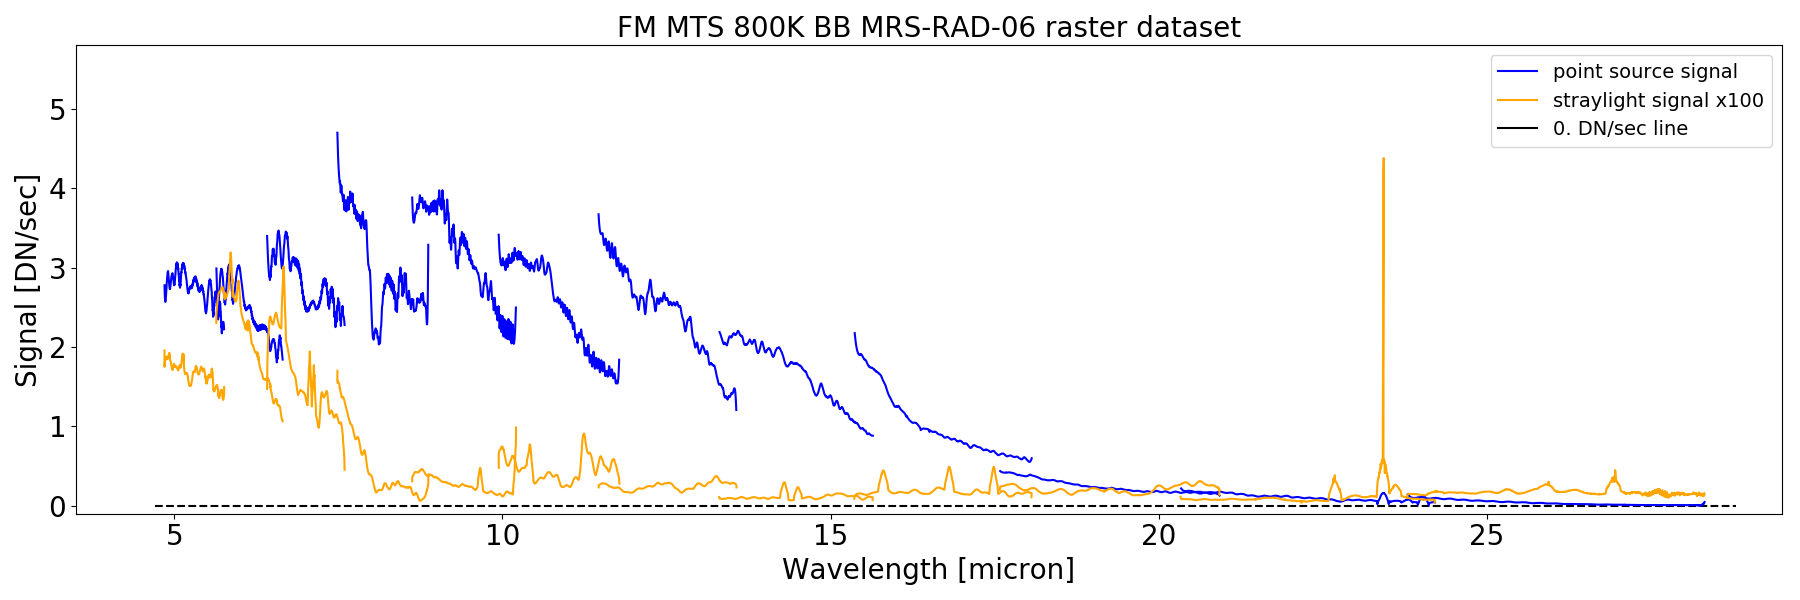

<IPython.core.display.Javascript object>


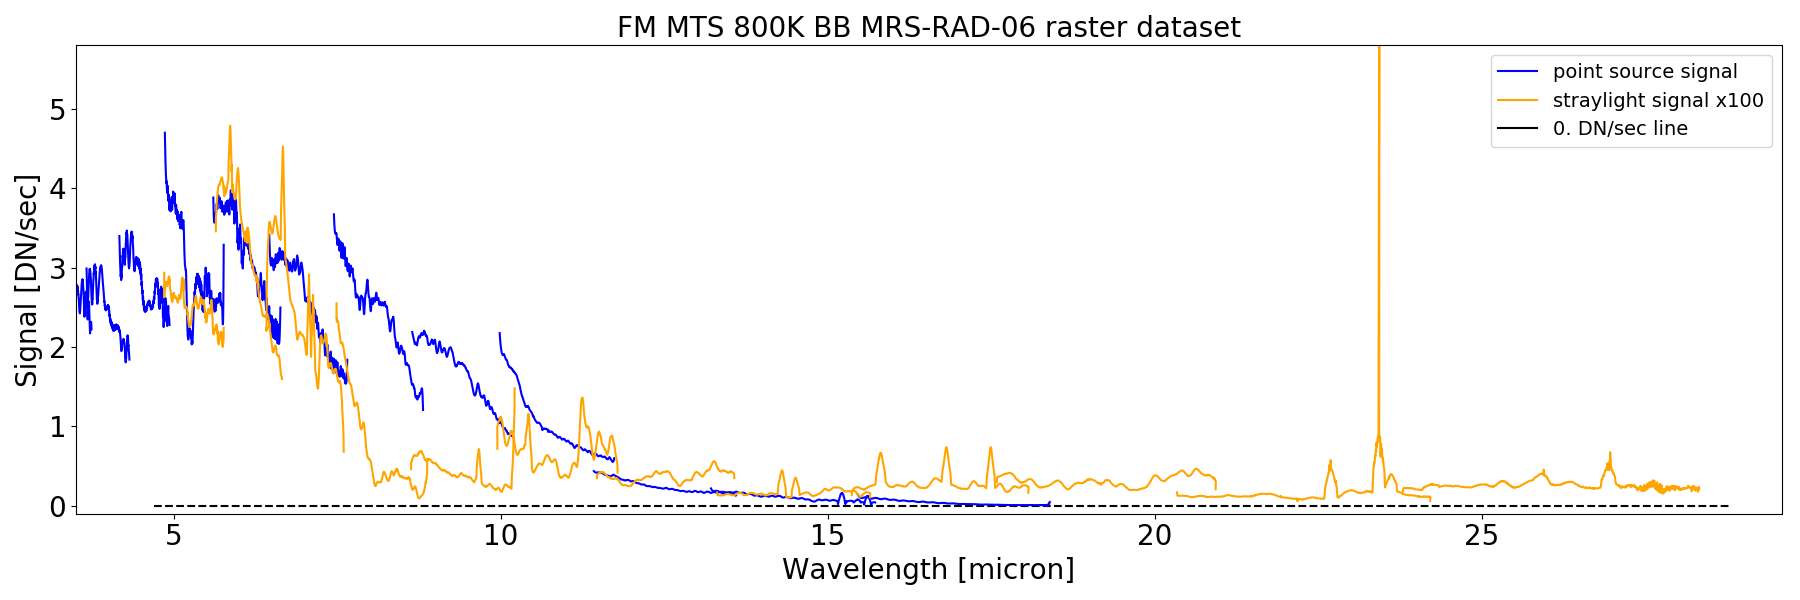

In [40]:
from scipy.signal import savgol_filter
plt.figure(figsize=(18,6))
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    y = point_source_signal_FM_RAD_06[band][ypos,xpos_FM_RAD_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]])]
    plt.plot(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]])][~isnan(y)],savgol_filter(y[~isnan(y)],51,3 ),'b')
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    plt.plot(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]])],straylight_imgs_FM_RAD_06[band][ypos,xpos_FM_RAD_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]])]*100.,'orange')
plt.xlim(3.5)
plt.ylim(-0.1,5.8)
plt.hlines(0,4.7,28.8,'k',linestyle='dashed')
# plt.hlines(0.23,4.7,28.8,'r',linestyle='dashed')
# plt.vlines(8.08,-1,6,'magenta',linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Signal [DN/sec]')
plt.title('FM MTS 800K BB MRS-RAD-06 raster dataset')
legend_elements = [Line2D([0],[0],color='b',label='point source signal'),
                   Line2D([0],[0],color='orange',label='straylight signal x100'),
                   Line2D([0],[0],color='k',label='0. DN/sec line')]
plt.legend(handles=legend_elements,loc='upper right')
plt.tight_layout()

plt.figure(figsize=(18,6))
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    y = point_source_signal_FM_RAD_06[band][ypos,xpos_FM_RAD_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]])]
    plt.plot(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]])][~isnan(y)]/1.54,savgol_filter(y[~isnan(y)],51,3 ),'b')
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    plt.plot(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]])],straylight_imgs_FM_RAD_06[band][ypos,xpos_FM_RAD_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_RAD_06[band]])]*150.,'orange')
plt.xlim(3.5)
plt.ylim(-0.1,5.8)
plt.hlines(0,4.7,28.8,'k',linestyle='dashed')
# plt.hlines(0.23,4.7,28.8,'r',linestyle='dashed')
# plt.vlines(8.08,-1,6,'magenta',linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Signal [DN/sec]')
plt.title('FM MTS 800K BB MRS-RAD-06 raster dataset')
legend_elements = [Line2D([0],[0],color='b',label='point source signal'),
                   Line2D([0],[0],color='orange',label='straylight signal x100'),
                   Line2D([0],[0],color='k',label='0. DN/sec line')]
plt.legend(handles=legend_elements,loc='upper right')
plt.tight_layout()

<IPython.core.display.Javascript object>


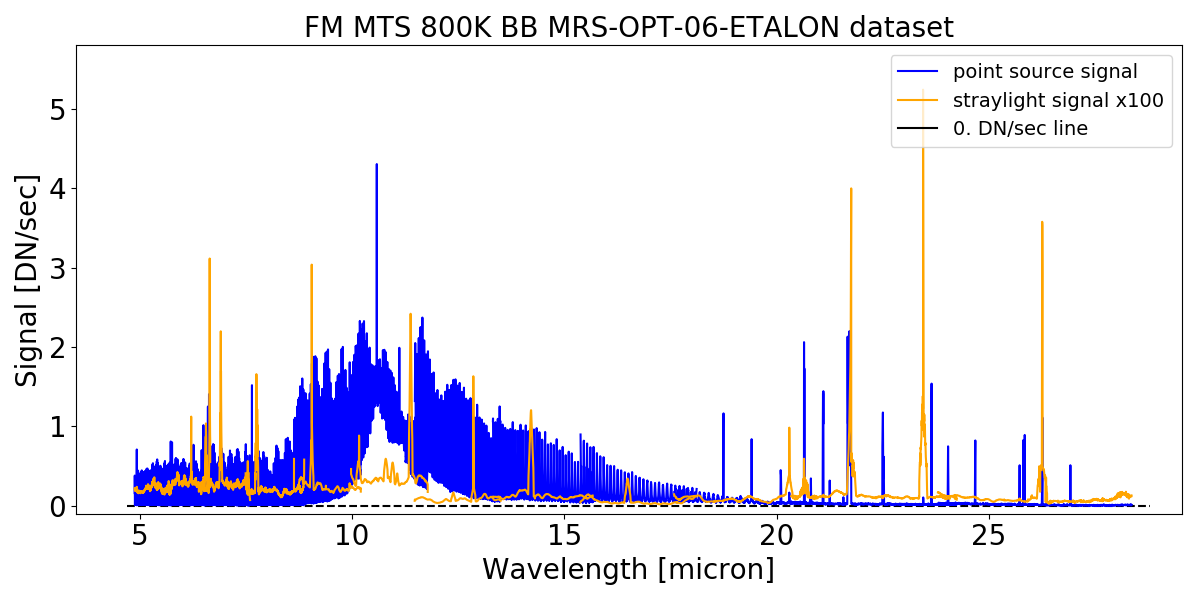

<IPython.core.display.Javascript object>


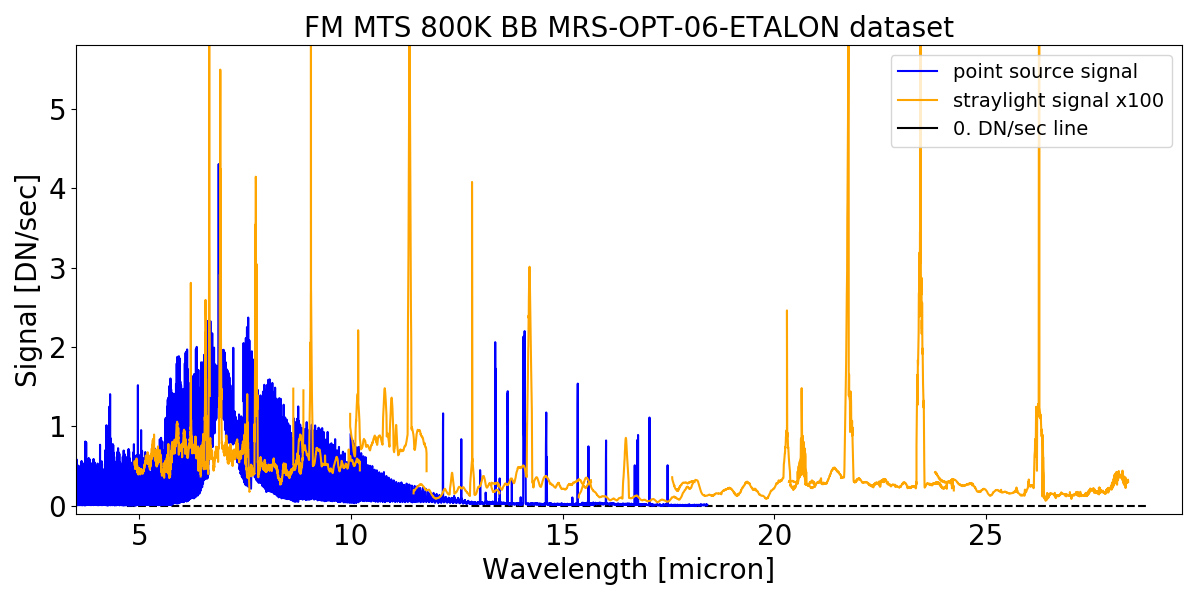

In [43]:
plt.figure(figsize=(12,6))
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    plt.plot(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]])],point_source_signal_FM_OPT_06[band][ypos,xpos_FM_OPT_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]])],'b')
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    plt.plot(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]])],straylight_imgs_FM_OPT_06[band][ypos,xpos_FM_OPT_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]])]*100.,'orange')
plt.xlim(3.5)
plt.ylim(-0.1,5.8)
plt.hlines(0,4.7,28.8,'k',linestyle='dashed')
# plt.hlines(0.23,4.7,28.8,'r',linestyle='dashed')
# plt.vlines(8.08,-1,6,'magenta',linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Signal [DN/sec]')
plt.title('FM MTS 800K BB MRS-OPT-06-ETALON dataset')
legend_elements = [Line2D([0],[0],color='b',label='point source signal'),
                   Line2D([0],[0],color='orange',label='straylight signal x100'),
                   Line2D([0],[0],color='k',label='0. DN/sec line')]
plt.legend(handles=legend_elements,loc='upper right')
plt.tight_layout()

plt.figure(figsize=(12,6))
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    plt.plot(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]])]/1.54,point_source_signal_FM_OPT_06[band][ypos,xpos_FM_OPT_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]])],'b')
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    plt.plot(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]])],straylight_imgs_FM_OPT_06[band][ypos,xpos_FM_OPT_06[band]][nonzero(lambdaMaps[band][ypos,xpos_FM_OPT_06[band]])]*250.,'orange')
plt.xlim(3.5)
plt.ylim(-0.1,5.8)
plt.hlines(0,4.7,28.8,'k',linestyle='dashed')
# plt.hlines(0.23,4.7,28.8,'r',linestyle='dashed')
# plt.vlines(8.08,-1,6,'magenta',linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Signal [DN/sec]')
plt.title('FM MTS 800K BB MRS-OPT-06-ETALON dataset')
legend_elements = [Line2D([0],[0],color='b',label='point source signal'),
                   Line2D([0],[0],color='orange',label='straylight signal x100'),
                   Line2D([0],[0],color='k',label='0. DN/sec line')]
plt.legend(handles=legend_elements,loc='upper right')
plt.tight_layout()

<IPython.core.display.Javascript object>


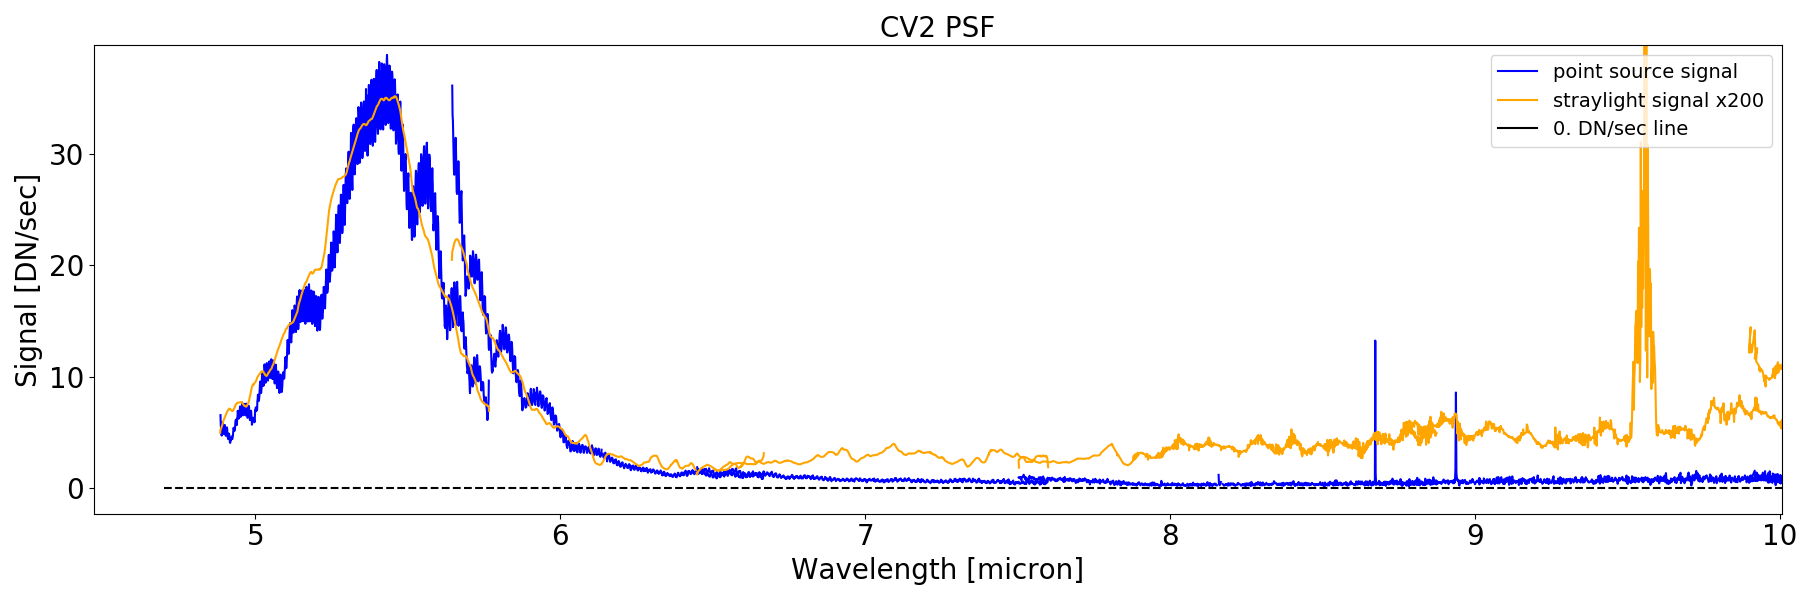

In [51]:
pointing = 'P2'
fudge_factor = 200.
plt.figure(figsize=(18,6))
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']: # 
    if band[0] in ['1','2']:
        plt.plot(lambdaMaps[band][ypos,xpos_CV2[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_CV2[pointing][band]])],point_source_signal_CV2[pointing][band][ypos,xpos_CV2[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_CV2[pointing][band]])],'b')
        plt.plot(lambdaMaps[band][ypos,xpos_CV2[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_CV2[pointing][band]])],straylight_imgs_CV2[pointing][band][ypos,xpos_CV2[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_CV2[pointing][band]])]*fudge_factor,'orange')
    elif band[0] in ['3','4']:
        ypos_p,xpos_p = funcs.detpixel_trace(band,d2cMaps[band],sliceID=d2cMaps[band]['nslices']/2,alpha_pos=0.)
        plt.plot(lambdaMaps[band][ypos_p,xpos_p][nonzero(lambdaMaps[band][ypos_p,xpos_p])],straylight_imgs_CV2[pointing][band][ypos_p,xpos_p][nonzero(lambdaMaps[band][ypos_p,xpos_p])],'orange')
plt.xlim(4.5)
plt.ylim(-0.1,45)
plt.hlines(0,4.7,28.8,'k',linestyle='dashed')
# plt.hlines(0.23,4.7,28.8,'r',linestyle='dashed')
# plt.vlines(8.08,-1,10,'magenta',linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Signal [DN/sec]')
plt.title('CV2 PSF')
legend_elements = [Line2D([0],[0],color='b',label='point source signal'),
                   Line2D([0],[0],color='orange',label='straylight signal x{}'.format(int(fudge_factor))),
                   Line2D([0],[0],color='k',label='0. DN/sec line')]
plt.legend(handles=legend_elements,loc='upper right')
plt.tight_layout()

<IPython.core.display.Javascript object>


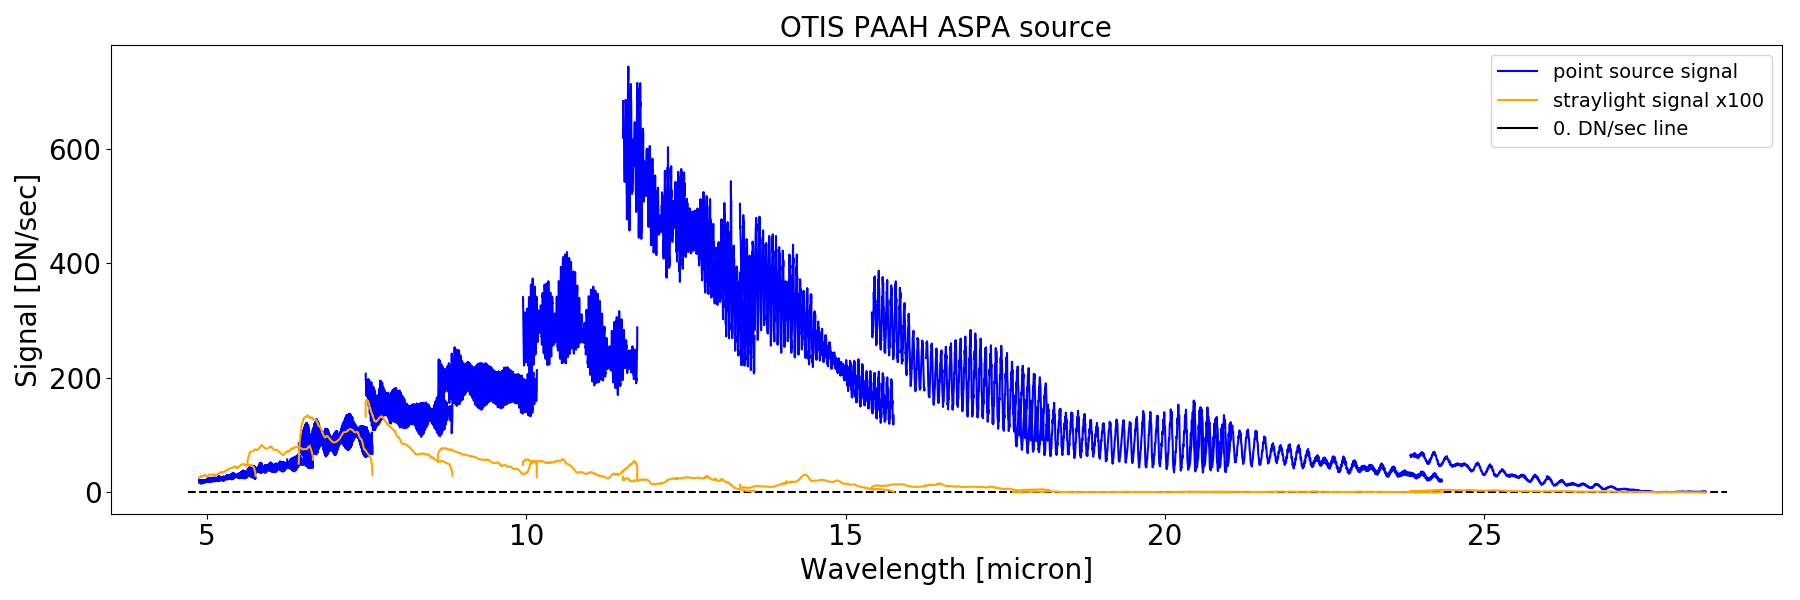

<IPython.core.display.Javascript object>


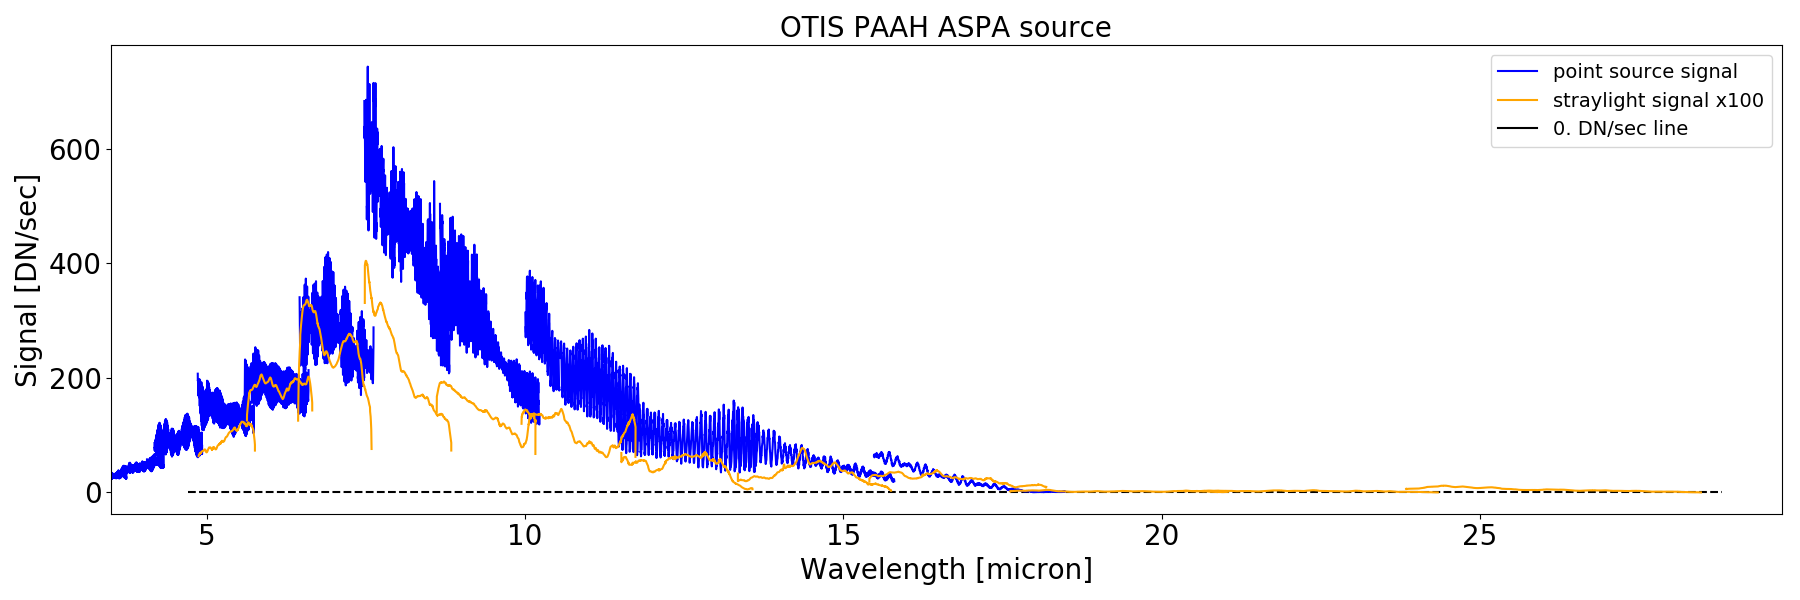

In [42]:
plt.figure(figsize=(18,6))
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    plt.plot(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]])],point_source_signal_OTIS_ASPA[pointing][band][ypos,xpos_OTIS_ASPA[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]])],'b')
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    plt.plot(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]])],straylight_imgs_OTIS_ASPA[pointing][band][ypos,xpos_OTIS_ASPA[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]])]*100.,'orange')
plt.xlim(3.5)
# plt.ylim(-0.1,5.8)
plt.hlines(0,4.7,28.8,'k',linestyle='dashed')
# plt.hlines(0.23,4.7,28.8,'r',linestyle='dashed')
# plt.vlines(8.08,-1,6,'magenta',linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Signal [DN/sec]')
plt.title('OTIS PAAH ASPA source')
legend_elements = [Line2D([0],[0],color='b',label='point source signal'),
                   Line2D([0],[0],color='orange',label='straylight signal x100'),
                   Line2D([0],[0],color='k',label='0. DN/sec line')]
plt.legend(handles=legend_elements,loc='upper right')
plt.tight_layout()

plt.figure(figsize=(18,6))
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    plt.plot(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]])]/1.54,point_source_signal_OTIS_ASPA[pointing][band][ypos,xpos_OTIS_ASPA[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]])],'b')
for band in ['1A','1B','1C','2A','2B','2C','3A','3B','3C','4A','4B','4C']:
    plt.plot(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]])],straylight_imgs_OTIS_ASPA[pointing][band][ypos,xpos_OTIS_ASPA[pointing][band]][nonzero(lambdaMaps[band][ypos,xpos_OTIS_ASPA[pointing][band]])]*250.,'orange')
plt.xlim(3.5)
# plt.ylim(-0.1,5.8)
plt.hlines(0,4.7,28.8,'k',linestyle='dashed')
# plt.hlines(0.23,4.7,28.8,'r',linestyle='dashed')
# plt.vlines(8.08,-1,6,'magenta',linestyle='dashed')
plt.xlabel('Wavelength [micron]')
plt.ylabel('Signal [DN/sec]')
plt.title('OTIS PAAH ASPA source')
legend_elements = [Line2D([0],[0],color='b',label='point source signal'),
                   Line2D([0],[0],color='orange',label='straylight signal x100'),
                   Line2D([0],[0],color='k',label='0. DN/sec line')]
plt.legend(handles=legend_elements,loc='upper right')
plt.tight_layout()

<IPython.core.display.Javascript object>


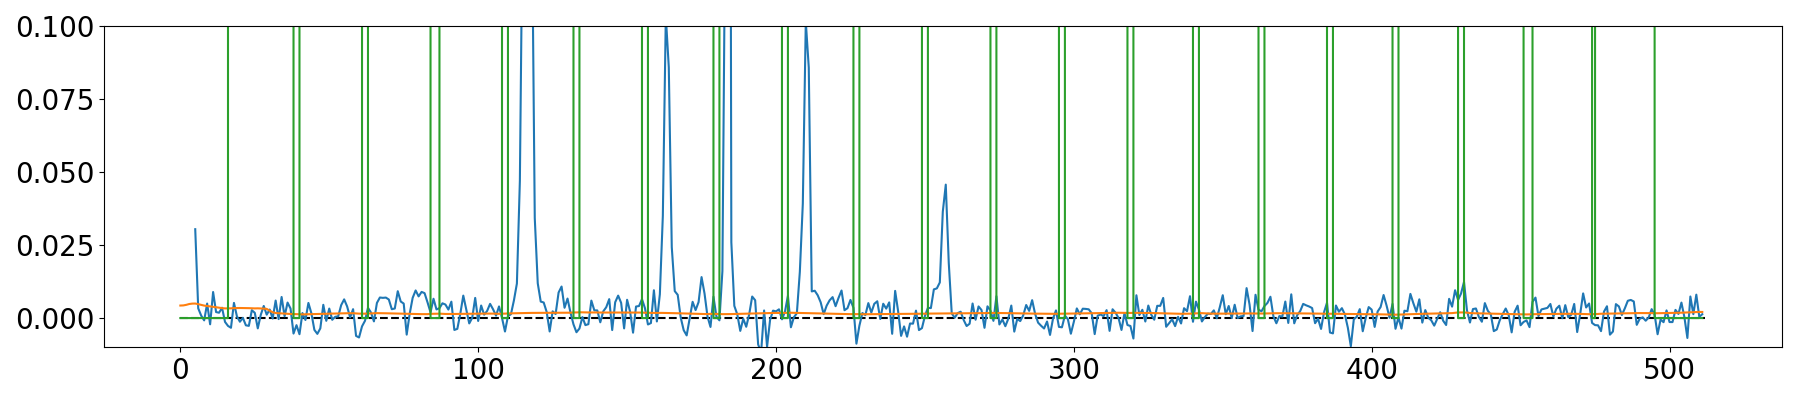

In [32]:
plt.figure(figsize=(18,4))
plt.plot(point_source_signal_FM_OPT_06['1A'][175,:512])
plt.plot(straylight_imgs_FM_OPT_06['1A'][175,:512])
plt.plot(sliceMaps['1A'][175,:512])
plt.hlines(0,0,512,linestyle='dashed')
plt.ylim(-0.01,0.1)
plt.tight_layout()